<a href="https://colab.research.google.com/github/rabastos44/Bootcamp-Data-Science-Alura/blob/master/Desafios_Modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Dados Modulo 1

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1)
usaveis["Total"] = usaveis.sum(axis=1) # [0,1,2] ["SP"]
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 1000000
ordenado_por_total.index = ordenado_por_total.index.str[3:]
meses_filtrados = ordenado_por_total.columns[47:150]
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


#Modulo 2 - Desafios

##Aula 1

###Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.



In [3]:
wiki = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
tabela_populacao = wiki[0]
tabela_populacao[['Unidade federativa','População']].head()


,Unidade federativa,População
0,São Paulo,46 289 333
1,Minas Gerais,21 292 666
2,Rio de Janeiro,17 366 189
3,Bahia,14 930 634
4,Paraná,11 516 840


###Desafio 02 - Neste desafio temos uma série de passos:

- Padronizar os nomes das colunas
- Transformar os dados nos tipos corretos
- Transformar a UF em index

In [4]:
# - Padronizar os nomes das colunas
populacao = tabela_populacao.loc[:,['Unidade federativa','População']]
populacao['populacao']= populacao.loc[:,'População']
populacao['uf'] = populacao.loc[:,'Unidade federativa'] 
populacao = populacao[['uf','populacao']]
# - Transformar os dados nos tipos corretos
populacao['populacao']= populacao['populacao'].str.replace(' ','').astype(int)
# - Transformar a UF em index
populacao.set_index('uf', inplace=True)
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


###Desafio 03 - Buscar na documentação alguns métodos envolvendo strings






In [5]:
populacao.index.str.split(" ")

Index([                ['São', 'Paulo'],              ['Minas', 'Gerais'],
               ['Rio', 'de', 'Janeiro'],                        ['Bahia'],
                             ['Paraná'],   ['Rio', 'Grande', 'do', 'Sul'],
                         ['Pernambuco'],                        ['Ceará'],
                               ['Pará'],            ['Santa', 'Catarina'],
                           ['Maranhão'],                        ['Goiás'],
                           ['Amazonas'],            ['Espírito', 'Santo'],
                            ['Paraíba'], ['Rio', 'Grande', 'do', 'Norte'],
                     ['Mato', 'Grosso'],                      ['Alagoas'],
                              ['Piauí'],          ['Distrito', 'Federal'],
        ['Mato', 'Grosso', 'do', 'Sul'],                      ['Sergipe'],
                           ['Rondônia'],                    ['Tocantins'],
                               ['Acre'],                        ['Amapá'],
                         

In [6]:
populacao.index.str.lower()

Index(['são paulo', 'minas gerais', 'rio de janeiro', 'bahia', 'paraná',
       'rio grande do sul', 'pernambuco', 'ceará', 'pará', 'santa catarina',
       'maranhão', 'goiás', 'amazonas', 'espírito santo', 'paraíba',
       'rio grande do norte', 'mato grosso', 'alagoas', 'piauí',
       'distrito federal', 'mato grosso do sul', 'sergipe', 'rondônia',
       'tocantins', 'acre', 'amapá', 'roraima'],
      dtype='object', name='uf')

In [7]:
populacao.index.str.startswith('Mato')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False])

In [8]:
populacao.index.str.rfind('Sul')

Int64Index([-1, -1, -1, -1, -1, 14, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
            -1, -1, -1, 15, -1, -1, -1, -1, -1, -1],
           dtype='int64', name='uf')

In [9]:
populacao.index.str[3:]

Index([' Paulo', 'as Gerais', ' de Janeiro', 'ia', 'aná', ' Grande do Sul',
       'nambuco', 'rá', 'á', 'ta Catarina', 'anhão', 'ás', 'zonas',
       'írito Santo', 'aíba', ' Grande do Norte', 'o Grosso', 'goas', 'uí',
       'trito Federal', 'o Grosso do Sul', 'gipe', 'dônia', 'antins', 'e',
       'pá', 'aima'],
      dtype='object', name='uf')

In [10]:
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

###Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".


In [11]:
def adiciona_populacao(gastos_fonte, populacao_fonte):
  populacao = populacao_fonte.loc[:,['Unidade federativa','População']]
  populacao['populacao']= populacao.loc[:,'População']
  populacao['uf'] = populacao.loc[:,'Unidade federativa'] 
  populacao = populacao[['uf','populacao']]
  populacao['populacao']= populacao['populacao'].str.replace(' ','').astype(int)
  populacao.set_index('uf',inplace=True)
  populacao.index.str.strip()

  gastos = gastos_fonte.copy()
  gastos.index = gastos_fonte.index

  unida = populacao.join(gastos)
  unida['gastos'] = unida[unida.columns[1]]
  unida = unida.drop(unida.columns[1],axis=1)
  return populacao,unida

populacao, gastos_e_populacao = adiciona_populacao(gastos_do_mais_recente,tabela_populacao)


##Aula 2

###Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada por habitante.



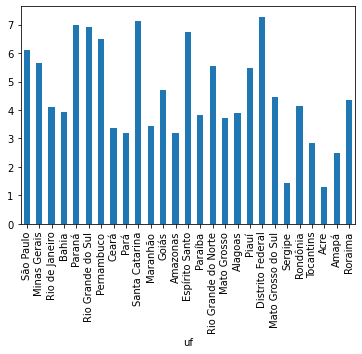

In [12]:
gastos_e_populacao["gasto_por_habitante"] = gastos_e_populacao["gastos"]*1000000 / gastos_e_populacao["populacao"]
gastos_ordenado_por_populacao = gastos_e_populacao.sort_values('gastos',ascending=False)
gastos_e_populacao['gasto_por_habitante'].plot(kind='bar')

###Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.



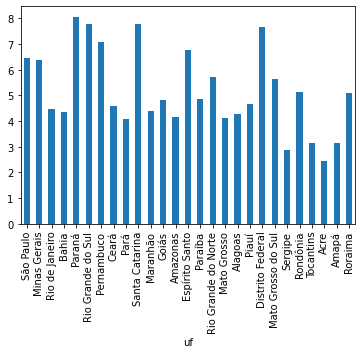

In [13]:
mes_anterior_recente = ordenado_por_total.columns[-2]
gastos_mes_anterior = ordenado_por_total[mes_anterior_recente]*1000000

populacao, unida_anterior= adiciona_populacao(gastos_mes_anterior, tabela_populacao)
unida_anterior['gasto_por_habitante'] = unida_anterior['gastos']/unida_anterior['populacao']

unida_anterior['gasto_por_habitante'].plot(kind='bar')

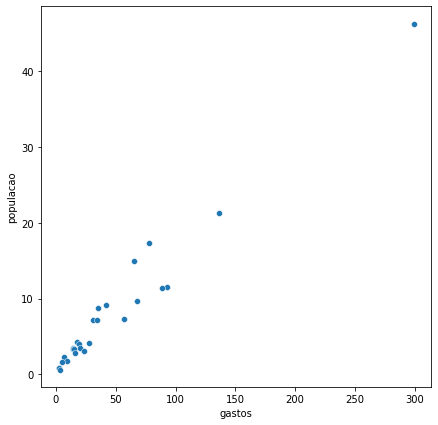

In [14]:
import seaborn as sns

plt.figure(figsize=(7,7))
sns.scatterplot(data=unida_anterior/1000000 , x ='gastos', y='populacao')

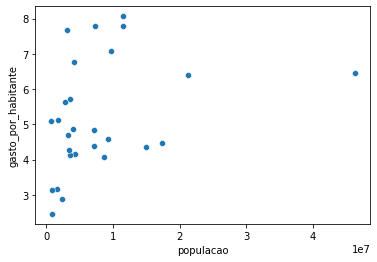

In [15]:
sns.scatterplot(data=unida_anterior, x="populacao", y="gasto_por_habitante")


###Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.



In [16]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  gastos_do_mes.index = gastos_do_mes.index
  dados[f"gastos_{mes}"] = gastos_do_mes 
  dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"]*1000000/ dados["populacao"]


In [17]:

insere_gastos_e_gasto_por_habitante_para(ordenado_por_total,gastos_e_populacao,'2020/Mai')
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total,gastos_e_populacao,'2020/Jun')
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total,gastos_e_populacao,'2020/Jul')

gastos_e_populacao.head()

,populacao,gastos,gasto_por_habitante,gastos_2020/Mai,gasto_por_habitante_2020/Mai,gastos_2020/Jun,gasto_por_habitante_2020/Jun,gastos_2020/Jul,gasto_por_habitante_2020/Jul
uf,,,,,,,,,
São Paulo,46289333,282.709570,6.107445,302.857661,6.542710,299.060852,6.460686,282.709570,6.107445
Minas Gerais,21292666,120.467187,5.657685,136.867276,6.427907,135.977572,6.386122,120.467187,5.657685
Rio de Janeiro,17366189,71.540227,4.119512,86.281033,4.968334,77.604925,4.468737,71.540227,4.119512
Bahia,14930634,58.898100,3.944782,61.756776,4.136246,65.159301,4.364135,58.898100,3.944782
Paraná,11516840,80.320853,6.974209,106.103738,9.212921,92.901461,8.066576,80.320853,6.974209


In [18]:
gastos_mensais = gastos_e_populacao[['populacao',
                    'gastos_2020/Mai',
                    'gastos_2020/Jun',
                    'gastos_2020/Jul']]

gastos_mensais = gastos_mensais.reset_index()
gastos_mensais_melt = gastos_mensais.melt(id_vars=['uf','populacao'],var_name='mes',value_name='valor')
gastos_mensais_melt.head()

,uf,populacao,mes,valor
0,São Paulo,46289333,gastos_2020/Mai,302.857661
1,Minas Gerais,21292666,gastos_2020/Mai,136.867276
2,Rio de Janeiro,17366189,gastos_2020/Mai,86.281033
3,Bahia,14930634,gastos_2020/Mai,61.756776
4,Paraná,11516840,gastos_2020/Mai,106.103738


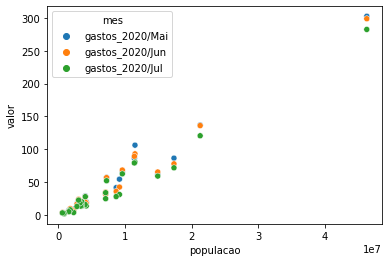

In [19]:
import seaborn as sns

axis = sns.scatterplot(data = gastos_mensais_melt, x='populacao', y='valor', hue= 'mes')


###Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.
 


## Aula 3

In [20]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.834915,70.301090,48.855046,45.897705,44.122593,33.410124,26.222079,24.409573,27.643305,18.149374,20.126081,13.452264,10.032886,9.110109,10.871590,10.215957,8.279289,9.711680,8.112220,7.929895,7.934652,4.636851,5.051932,1.940793,1.743979,0.771688,1.275064
2008/Mar,170.481850,79.119006,55.611791,52.928696,42.892666,41.301703,30.716362,27.483480,30.085370,20.992213,22.149376,14.750895,12.262049,10.126627,12.348758,11.627918,9.793889,10.428191,9.210506,9.416368,8.641517,5.017838,5.200152,1.955722,2.057439,0.876091,1.177746
2008/Abr,170.278286,79.046322,56.115136,51.972417,45.295963,42.826994,30.589333,27.806641,31.376221,21.049477,23.436683,15.148647,12.453467,10.964235,12.680965,11.922015,8.997543,10.227943,10.466692,9.390588,8.531576,5.265951,5.343715,2.143354,2.057830,0.896953,1.396372
2008/Mai,172.402181,79.268070,55.574832,51.679351,43.951349,42.071294,31.409553,28.354280,31.189905,19.162547,23.861081,14.543680,11.789786,11.032871,13.258412,11.900817,9.842109,10.562149,9.844096,9.378197,9.079902,5.367095,5.344488,2.280383,2.226578,1.027289,1.411521
2008/Jun,175.416596,79.608653,56.094755,53.759674,44.102926,39.910042,28.947511,28.993293,29.463965,20.332534,23.502916,14.553978,11.889687,10.450599,12.246686,11.969272,10.257782,10.465089,10.288668,9.450301,8.646296,4.981036,5.398413,2.624543,2.112577,0.938294,1.420892



###Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.
###Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos

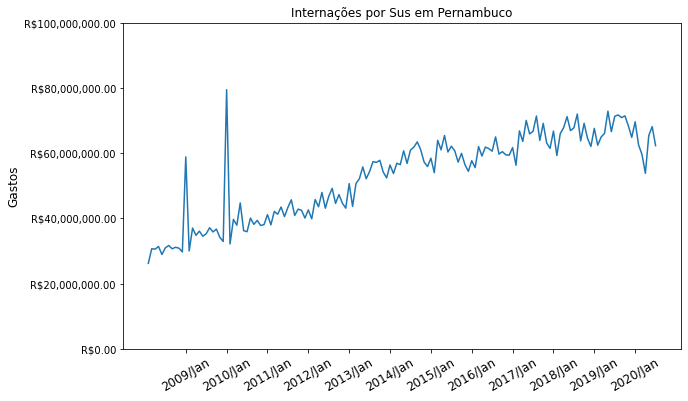

In [21]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal*1000000, x=mensal.index, y='Pernambuco')
plt.ylabel('Gastos', size=12)

plt.xticks(rotation=30, size= 12)
plt.ylim(0, 100000000)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
ax.set_title('Internações por Sus em Pernambuco')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))

plt.show()


##Aula 4

In [22]:
from datetime import date

meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)

mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)
mensal_aberto.columns = ["mes", "uf", "gasto"]

### Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.



In [23]:
from datetime import time
from datetime import timedelta

dt = date(2020,12,8)
dt.toordinal()
dt.isocalendar()

tm = time(23,59)
tm2 = time(10,10) 

delta = timedelta(days=1)

dt + delta


datetime.date(2020, 12, 9)


###Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.



In [24]:
colunas = mensal.index
mensal_fechado= pd.pivot_table(mensal_aberto,index = 'mes', columns='uf',values = 'gasto', )
mensal_fechado.head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.743979,8.112220,1.275064,7.934652,33.410124,27.643305,10.215957,10.032886,18.149374,13.452264,7.929895,8.279289,70.301090,48.855046,10.871590,20.126081,26.222079,9.711680,9.110109,45.897705,44.122593,1.940793,0.771688,24.409573,4.636851,172.834915,5.051932
2008-03-01,2.057439,9.210506,1.177746,8.641517,41.301703,30.085370,11.627918,12.262049,20.992213,14.750895,9.416368,9.793889,79.119006,55.611791,12.348758,22.149376,30.716362,10.428191,10.126627,52.928696,42.892666,1.955722,0.876091,27.483480,5.017838,170.481850,5.200152
2008-04-01,2.057830,10.466692,1.396372,8.531576,42.826994,31.376221,11.922015,12.453467,21.049477,15.148647,9.390588,8.997543,79.046322,56.115136,12.680965,23.436683,30.589333,10.227943,10.964235,51.972417,45.295963,2.143354,0.896953,27.806641,5.265951,170.278286,5.343715
2008-05-01,2.226578,9.844096,1.411521,9.079902,42.071294,31.189905,11.900817,11.789786,19.162547,14.543680,9.378197,9.842109,79.268070,55.574832,13.258412,23.861081,31.409553,10.562149,11.032871,51.679351,43.951349,2.280383,1.027289,28.354280,5.367095,172.402181,5.344488
2008-06-01,2.112577,10.288668,1.420892,8.646296,39.910042,29.463965,11.969272,11.889687,20.332534,14.553978,9.450301,10.257782,79.608653,56.094755,12.246686,23.502916,28.947511,10.465089,10.450599,53.759674,44.102926,2.624543,0.938294,28.993293,4.981036,175.416596,5.398413


###Desafio 03: Melhorar o gráfico da distribuição do gráfico:

Escolha apenas alguns estados.
Mude a palete de cores.
Posicione a legenda de forma mais adequada.
Adicione título principal e nos eixos x e y.


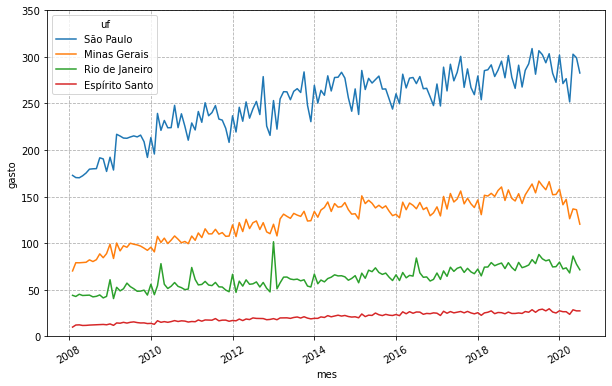

In [54]:
plt.figure(figsize=(10,6))
mensal_filtro = mensal_aberto.query('uf == "São Paulo" or uf == "Minas Gerais" or uf == "Rio de Janeiro" or uf == "Espírito Santo"')
ax = sns.lineplot(data=mensal_filtro, x="mes", y="gasto", hue="uf")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

ValueError: ignored